<a href="https://colab.research.google.com/github/GunduSriBhanu/SriBhanu_DATA606/blob/main/src/Eda_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-profiling
!pip install pycaret
from pycaret.regression import *
from pandas_profiling import ProfileReport

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Exploratory Data Analysis

## Data Loading

In [3]:
df_heart = pd.read_csv("https://raw.githubusercontent.com/GunduSriBhanu/SriBhanu_DATA606/main/data/uci_heart_data.csv")
df_heart.shape

(900, 16)

In [4]:
df_heart.head()

Unnamed: 0   age  sex  chest_pain_type  resting blood pressure  \
0           0  63.0  1.0              1.0                   145.0   
1           1  67.0  1.0              4.0                   160.0   
2           2  67.0  1.0              4.0                   120.0   
3           3  37.0  1.0              3.0                   130.0   
4           4  41.0  0.0              2.0                   130.0   

   cholestoral  fasting_blood_sugar  ekg_results  max_hr  exercise_angina  \
0        233.0                  1.0          2.0   150.0              0.0   
1        286.0                  0.0          2.0   108.0              1.0   
2        229.0                  0.0          2.0   129.0              1.0   
3        250.0                  0.0          0.0   187.0              0.0   
4        204.0                  0.0          2.0   172.0              0.0   

   ST_depression  slope_of_st  vessels  thallium  heart_disease    country  
0            2.3          3.0      0.0       6.0              0  Cleveland  
1            1.5          2.0      3.0       3.0              2  Cleveland  
2            2.6          2.0      2.0       7.0              1  Cleveland  
3            3.5          3.0      0.0       3.0              0  Cleveland  
4            1.4          1.0      0.0       3.0              0  Cleveland

In [5]:
df_heart.tail()

Unnamed: 0   age  sex  chest_pain_type  resting blood pressure  \
895         895  52.0  1.0              4.0                   160.0   
896         896  54.0  0.0              3.0                   130.0   
897         897  56.0  1.0              4.0                   155.0   
898         898  58.0  0.0              2.0                   180.0   
899         899  65.0  1.0              4.0                   130.0   

     cholestoral  fasting_blood_sugar  ekg_results  max_hr  exercise_angina  \
895        331.0                  0.0          0.0    94.0              1.0   
896        294.0                  0.0          1.0   100.0              1.0   
897        342.0                  1.0          0.0   150.0              1.0   
898        393.0                  0.0          0.0   110.0              1.0   
899        275.0                  0.0          1.0   115.0              1.0   

     ST_depression  slope_of_st  vessels  thallium  heart_disease  country  
895            2.5          1.0      0.0       3.0              1  Hungary  
896            0.0          2.0      0.0       3.0              1  Hungary  
897            3.0          2.0      0.0       3.0              1  Hungary  
898            1.0          2.0      0.0       7.0              1  Hungary  
899            1.0          2.0      0.0       3.0              1  Hungary

In [6]:
df_heart.describe()

Unnamed: 0         age         sex  chest_pain_type  \
count  900.000000  900.000000  900.000000       900.000000   
mean   449.500000   52.278889    0.694444         3.101111   
std    259.951919    9.187274    0.460898         0.964209   
min      0.000000   28.000000    0.000000         1.000000   
25%    224.750000   45.000000    0.000000         2.000000   
50%    449.500000   53.000000    1.000000         3.000000   
75%    674.250000   59.000000    1.000000         4.000000   
max    899.000000   77.000000    1.000000         4.000000   

       resting blood pressure  cholestoral  fasting_blood_sugar  ekg_results  \
count              899.000000   877.000000           900.000000   900.000000   
mean               131.981090   247.977195             0.122222     0.737778   
std                 17.593868    57.122890             0.327724     0.930341   
min                 92.000000    85.000000             0.000000     0.000000   
25%                120.000000   211.000000             0.000000     0.000000   
50%                130.000000   242.000000             0.000000     0.000000   
75%                140.000000   277.000000             0.000000     2.000000   
max                200.000000   603.000000             1.000000     2.000000   

           max_hr  exercise_angina  ST_depression  slope_of_st     vessels  \
count  899.000000       900.000000     900.000000   900.000000  900.000000   
mean   146.192436         0.318889       0.891444     1.507778    0.446667   
std     23.601784         0.466305       1.104589     0.588115    0.826723   
min     71.000000         0.000000       0.000000     1.000000    0.000000   
25%    130.000000         0.000000       0.000000     1.000000    0.000000   
50%    150.000000         0.000000       0.500000     1.000000    0.000000   
75%    163.000000         1.000000       1.500000     2.000000    1.000000   
max    202.000000         1.000000       6.200000     3.000000    3.000000   

         thallium  heart_disease  
count  900.000000     900.000000  
mean     4.242222       0.748889  
std      1.809994       1.078276  
min      3.000000       0.000000  
25%      3.000000       0.000000  
50%      3.000000       0.000000  
75%      7.000000       1.000000  
max      7.000000       4.000000

#### Assigning datatypes based on the analysis of categories and numerical.
From my observation, these columns must be object data types( categorical features):

**Categorical datatypes are:**

sex

chest_pain_type

ekg_results 

exercise_angina

slope_of_st

thallium

heart_disease

**Numerical datatypes are:**

age 

resting blood pressure

cholestoral

fasting_blood_sugar

max_hr

ST_depression

vessels


In [7]:
categorical_columns = ['sex','chest_pain_type','ekg_results','fasting_blood_sugar','exercise_angina','slope_of_st','thallium','heart_disease']
numerical_columns = ['age','resting blood pressure','cholestoral','max_hr','ST_depression','vessels']

In [8]:
df_heart[numerical_columns] = df_heart[numerical_columns].apply(pd.to_numeric)
for i in categorical_columns:
  df_heart[i] = df_heart[i].astype(str)
print(df_heart.dtypes)

Unnamed: 0                  int64
age                       float64
sex                        object
chest_pain_type            object
resting blood pressure    float64
cholestoral               float64
fasting_blood_sugar        object
ekg_results                object
max_hr                    float64
exercise_angina            object
ST_depression             float64
slope_of_st                object
vessels                   float64
thallium                   object
heart_disease              object
country                    object
dtype: object


In [9]:
df_heart = df_heart.drop(columns=['Unnamed: 0'])

In [10]:
# 'sex','chest_pain_type','ekg_results','exercise_angina','slope_of_st','thallium','heart_disease','vessels'
df_heart['sex'] = df_heart['sex'].replace({'0':'Female', '1':'Male','0.0':'Female', '1.0':'Male'})
df_heart['chest_pain_type'] = df_heart['chest_pain_type'].replace({'1':'Typical_Angina','2':'Atypical_Angina','3':'Non_Anginal','4':'Asymptomatic_Bp','1.0':'Typical_Angina','2.0':'Atypical_Angina','3.0':'Non_Anginal','4.0':'Asymptomatic_Bp'})
df_heart['exercise_angina'] = df_heart['exercise_angina'].replace({'0':'Yes', '1':'No', '0.0':'Yes', '1.0':'No'})
df_heart['fasting_blood_sugar'] = df_heart['fasting_blood_sugar'].replace({'0':'Present', '1':'Absent', '0.0':'Present', '1.0':'Absent'})
df_heart['ekg_results'] = df_heart['ekg_results'].replace({'0.0':'Normal', '1.0' : 'Abnormal', '2.0':'Probable','0':'Normal', '1' : 'Abnormal', '2':'Probable'})
df_heart['slope_of_st'] = df_heart['slope_of_st'].replace({'1.0' : 'Upsloping', '2.0' :'Flat', '3.0' : 'Downsloping','1' : 'Upsloping', '2' :'Flat', '3' : 'Downsloping'})
df_heart['thallium'] = df_heart['thallium'].replace({'3.0':'Normal','6.0' :'Fixed_Defect', '7.0' : 'Reversable_Defect','3':'Normal','6' :'Fixed_Defect', '7' : 'Reversable_Defect'})
df_heart['heart_disease'] = df_heart['heart_disease'].replace({'0':'Absence', '1' : 'Presence', '2' : 'Presence', '3' : 'Presence', '4' : 'Presence'})

In [11]:
df_heart.head()

age     sex  chest_pain_type  resting blood pressure  cholestoral  \
0  63.0    Male   Typical_Angina                   145.0        233.0   
1  67.0    Male  Asymptomatic_Bp                   160.0        286.0   
2  67.0    Male  Asymptomatic_Bp                   120.0        229.0   
3  37.0    Male      Non_Anginal                   130.0        250.0   
4  41.0  Female  Atypical_Angina                   130.0        204.0   

  fasting_blood_sugar ekg_results  max_hr exercise_angina  ST_depression  \
0              Absent    Probable   150.0             Yes            2.3   
1             Present    Probable   108.0              No            1.5   
2             Present    Probable   129.0              No            2.6   
3             Present      Normal   187.0             Yes            3.5   
4             Present    Probable   172.0             Yes            1.4   

   slope_of_st  vessels           thallium heart_disease    country  
0  Downsloping      0.0       Fixed_Defect       Absence  Cleveland  
1         Flat      3.0             Normal      Presence  Cleveland  
2         Flat      2.0  Reversable_Defect      Presence  Cleveland  
3  Downsloping      0.0             Normal       Absence  Cleveland  
4    Upsloping      0.0             Normal       Absence  Cleveland

In [12]:
df_heart.tail()

age     sex  chest_pain_type  resting blood pressure  cholestoral  \
895  52.0    Male  Asymptomatic_Bp                   160.0        331.0   
896  54.0  Female      Non_Anginal                   130.0        294.0   
897  56.0    Male  Asymptomatic_Bp                   155.0        342.0   
898  58.0  Female  Atypical_Angina                   180.0        393.0   
899  65.0    Male  Asymptomatic_Bp                   130.0        275.0   

    fasting_blood_sugar ekg_results  max_hr exercise_angina  ST_depression  \
895             Present      Normal    94.0              No            2.5   
896             Present    Abnormal   100.0              No            0.0   
897              Absent      Normal   150.0              No            3.0   
898             Present      Normal   110.0              No            1.0   
899             Present    Abnormal   115.0              No            1.0   

    slope_of_st  vessels           thallium heart_disease  country  
895   Upsloping      0.0             Normal      Presence  Hungary  
896        Flat      0.0             Normal      Presence  Hungary  
897        Flat      0.0             Normal      Presence  Hungary  
898        Flat      0.0  Reversable_Defect      Presence  Hungary  
899        Flat      0.0             Normal      Presence  Hungary

### Checking Outliers

In [13]:
numerical_columns = list(df_heart.loc[:,['age','resting blood pressure','cholestoral','max_hr','ST_depression','vessels']])
categorical_columns = list(df_heart.loc[:,['sex','chest_pain_type','ekg_results','fasting_blood_sugar','exercise_angina','slope_of_st','thallium','heart_disease']])

From the data, ST_depression and vessels are highly skewed.

## Duplicated values

In [14]:
df_heart.duplicated().sum()

1

In [15]:
df_heart[df_heart.duplicated()]

age     sex  chest_pain_type  resting blood pressure  cholestoral  \
708  49.0  Female  Atypical_Angina                   110.0          NaN   

    fasting_blood_sugar ekg_results  max_hr exercise_angina  ST_depression  \
708             Present      Normal   160.0             Yes            0.0   

    slope_of_st  vessels thallium heart_disease  country  
708   Upsloping      0.0   Normal       Absence  Hungary

In [16]:
df_heart = df_heart.drop_duplicates()
df_heart.shape

(899, 15)

### Note:
Missing values imputation is done in Feature processing

In [17]:
def Missing_values(df):
    #Finding null values from the dataframe
    null_values = df.isnull().sum().sort_values(ascending=False)
    #Finding null values percentage from the dataframe
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    #concating across columns
    null_values = pd.concat([null_values, null_percent], axis=1, keys=['Missing_values', '% Missing_values'])
    return null_values

Missing_values(df_heart)


Missing_values  % Missing_values
cholestoral                         22          0.024472
resting blood pressure               1          0.001112
max_hr                               1          0.001112
age                                  0          0.000000
sex                                  0          0.000000
chest_pain_type                      0          0.000000
fasting_blood_sugar                  0          0.000000
ekg_results                          0          0.000000
exercise_angina                      0          0.000000
ST_depression                        0          0.000000
slope_of_st                          0          0.000000
vessels                              0          0.000000
thallium                             0          0.000000
heart_disease                        0          0.000000
country                              0          0.000000

## Statastical distribution

In [18]:
#check data description
df_heart.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')

In [19]:
df_heart.corr()

age  resting blood pressure  cholestoral  \
age                     1.000000                0.248241     0.145268   
resting blood pressure  0.248241                1.000000     0.112902   
cholestoral             0.145268                0.112902     1.000000   
max_hr                 -0.309175               -0.094044    -0.055044   
ST_depression           0.246975                0.183552     0.057610   
vessels                 0.399967                0.064487     0.074236   

                          max_hr  ST_depression   vessels  
age                    -0.309175       0.246975  0.399967  
resting blood pressure -0.094044       0.183552  0.064487  
cholestoral            -0.055044       0.057610  0.074236  
max_hr                  1.000000      -0.275019 -0.117059  
ST_depression          -0.275019       1.000000  0.312532  
vessels                -0.117059       0.312532  1.000000

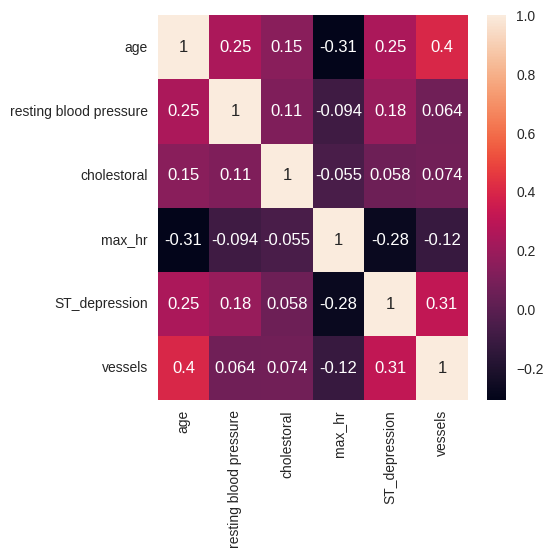

In [20]:
%matplotlib inline
plt.figure(figsize=(5,5))
sns.heatmap(df_heart.corr(),annot=True)
plt.show()

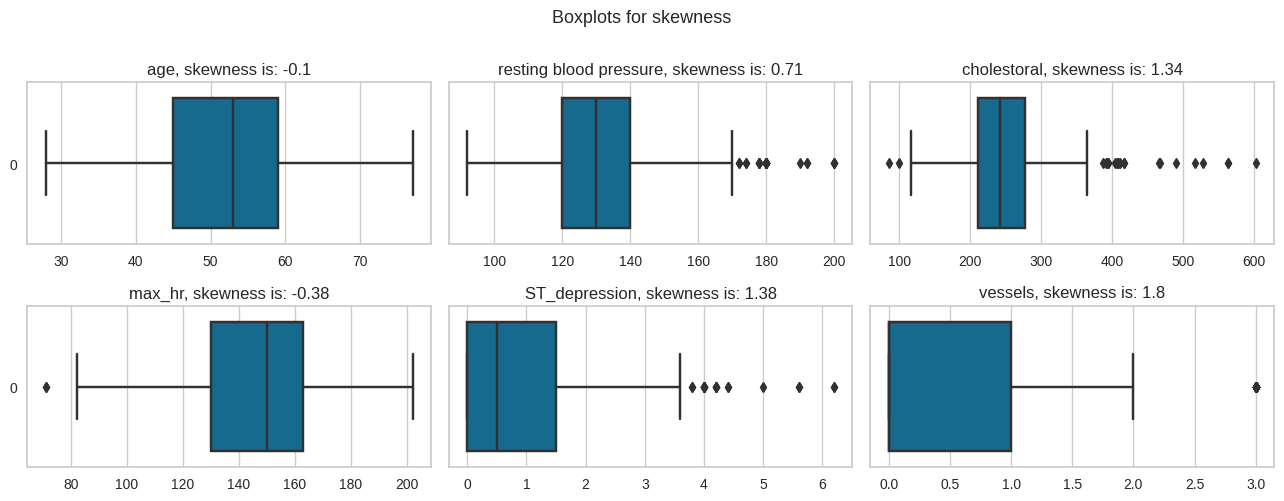

In [21]:
import plotly.express as px
from matplotlib import pyplot as plt
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=13)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df_heart, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots for skewness')
plt.tight_layout()


In [22]:
# define continuous variable & plot
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df_eda.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
        

outliers(df_heart[numerical_columns])

For the feature age, No of Outliers is 0
For the feature resting blood pressure, No of Outliers is 899
For the feature cholestoral, No of Outliers is 899
For the feature max_hr, No of Outliers is 899
For the feature ST_depression, No of Outliers is 20
For the feature vessels, No of Outliers is 40


In [23]:
df_eda = df_heart.fillna(df_heart.mean())
df_eda.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
resting blood pressure    0
cholestoral               0
fasting_blood_sugar       0
ekg_results               0
max_hr                    0
exercise_angina           0
ST_depression             0
slope_of_st               0
vessels                   0
thallium                  0
heart_disease             0
country                   0
dtype: int64

In [24]:
profile_report = ProfileReport(df_eda)
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
report = setup(data = df_eda, target = 'heart_disease', session_id=123)

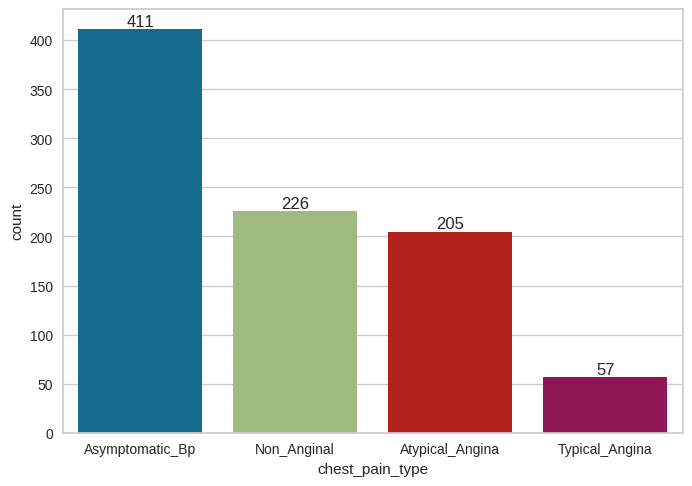

In [26]:
ax=sns.countplot(data=df_eda, x='chest_pain_type',order = df_eda['chest_pain_type'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.show()


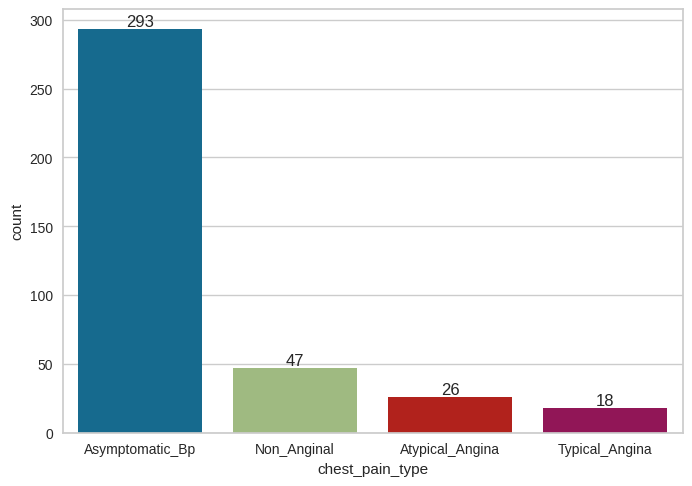

In [27]:
ax=sns.countplot(data=df_eda.query('heart_disease == "Presence"'), x='chest_pain_type',order = df_eda['chest_pain_type'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [28]:
df_vis = df_eda.dropna()

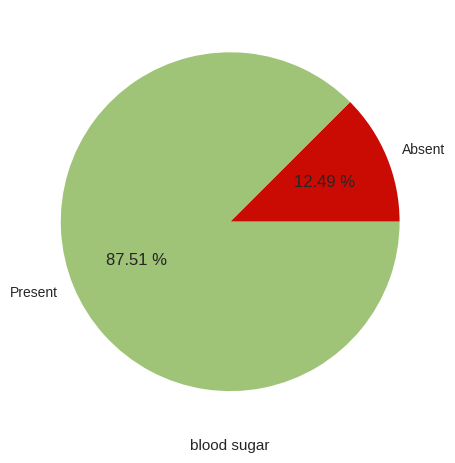

In [29]:
gb_sales2=df_vis.groupby(by="fasting_blood_sugar")[["cholestoral"]].sum()
res_2=gb_sales2.reset_index()
plt.pie(x="cholestoral",labels="fasting_blood_sugar", data=res_2, autopct="%.2f %%",colors=["r","g","b"])
plt.xlabel("blood sugar")
plt.show()

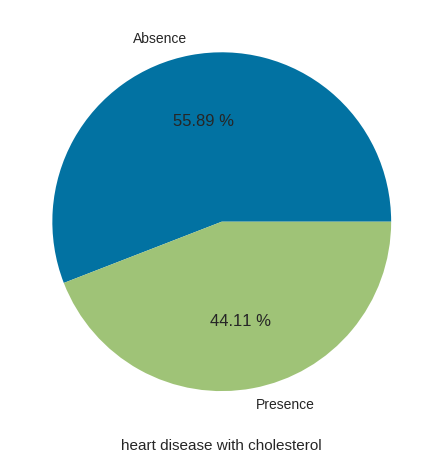

In [30]:
gb_sales2=df_vis.groupby(by="heart_disease")[["cholestoral"]].sum()
res_2=gb_sales2.reset_index()
plt.pie(x="cholestoral",labels="heart_disease", data=res_2, autopct="%.2f %%")
plt.xlabel("heart disease with cholesterol")
plt.show()

In [31]:
# Population indicator with Region column
df_dis = df_eda.query("heart_disease=='Presence'")
df_dis = df_dis[["chest_pain_type","fasting_blood_sugar","cholestoral","resting blood pressure","sex"]]
df_dis = df_dis.query("chest_pain_type=='Asymptomatic_Bp'")
df_dis

chest_pain_type fasting_blood_sugar  cholestoral  resting blood pressure  \
1    Asymptomatic_Bp             Present        286.0                   160.0   
2    Asymptomatic_Bp             Present        229.0                   120.0   
6    Asymptomatic_Bp             Present        268.0                   140.0   
8    Asymptomatic_Bp             Present        254.0                   130.0   
9    Asymptomatic_Bp              Absent        203.0                   140.0   
..               ...                 ...          ...                     ...   
893  Asymptomatic_Bp             Present        341.0                   140.0   
894  Asymptomatic_Bp             Present        266.0                   140.0   
895  Asymptomatic_Bp             Present        331.0                   160.0   
897  Asymptomatic_Bp              Absent        342.0                   155.0   
899  Asymptomatic_Bp             Present        275.0                   130.0   

        sex  
1      Male  
2      Male  
6    Female  
8      Male  
9      Male  
..      ...  
893    Male  
894    Male  
895    Male  
897    Male  
899    Male  

[293 rows x 5 columns]

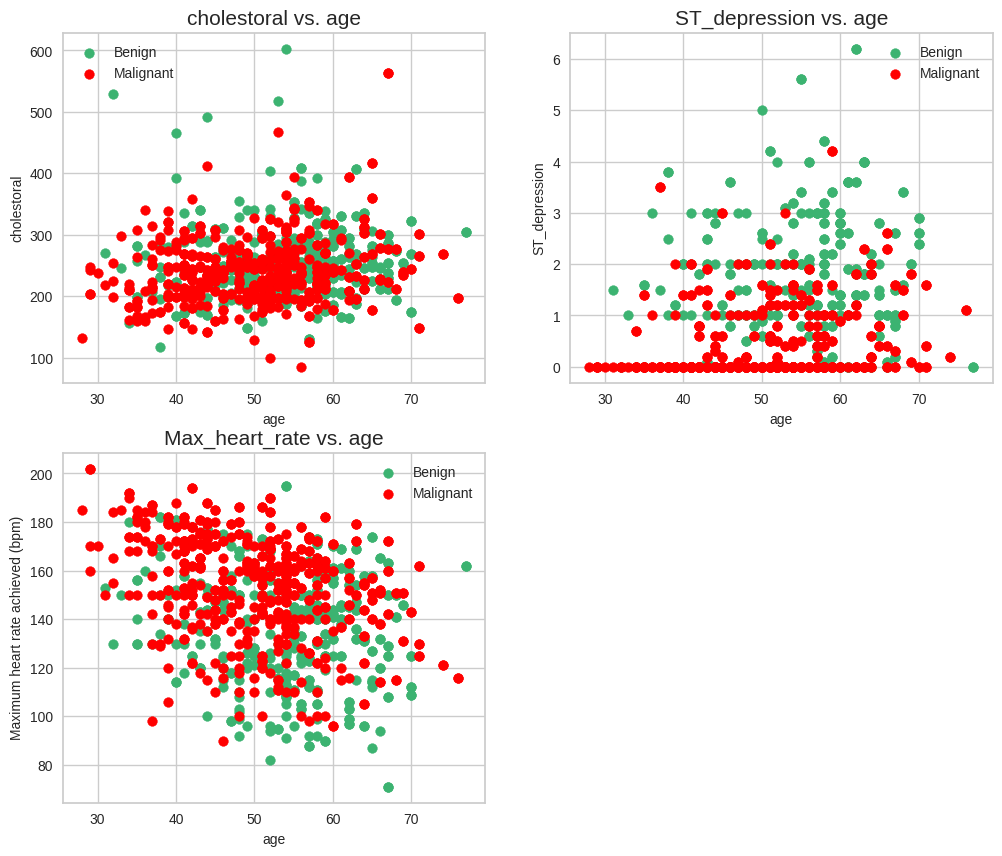

In [32]:
def features_with_age(data): 
    """
    Effects of features for heart disease by age
    """
    benign = data.heart_disease=='Presence'
    malignant = data.heart_disease=='Absence'
    
    age_benign = data.age[benign]
    age_malignant = data.age[malignant]
    
    #b_color = 'MediumSeaGreen'
    #m_color = 'LightCoral'

    b_color = 'MediumSeaGreen'
    m_color = 'Red'
    
    fig = plt.figure(figsize=(12, 10))

    # Cholestrol 
    plt.subplot(2, 2, 1)
    plt.scatter(x=age_benign, y=data.cholestoral[benign],color=b_color)
    plt.scatter(x=age_malignant, y=data.cholestoral[malignant], color=m_color)
    plt.title('cholestoral vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('cholestoral', fontsize=10) 

    # ST_depression
    plt.subplot(2, 2, 2)
    plt.scatter(x=age_benign, y=data.ST_depression[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.ST_depression[malignant], color=m_color)
    plt.title('ST_depression vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('ST_depression', fontsize=10)  

    # Maximum heart rate achieved (bpm)
    plt.subplot(2, 2, 3)
    plt.scatter(x=age_benign, y=data.max_hr[benign], color=b_color)
    plt.scatter(x=age_malignant, y=data.max_hr[malignant], color=m_color)
    plt.title('Max_heart_rate vs. age', fontsize=15)
    plt.legend(['Benign', 'Malignant'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)

features_with_age(df_eda);

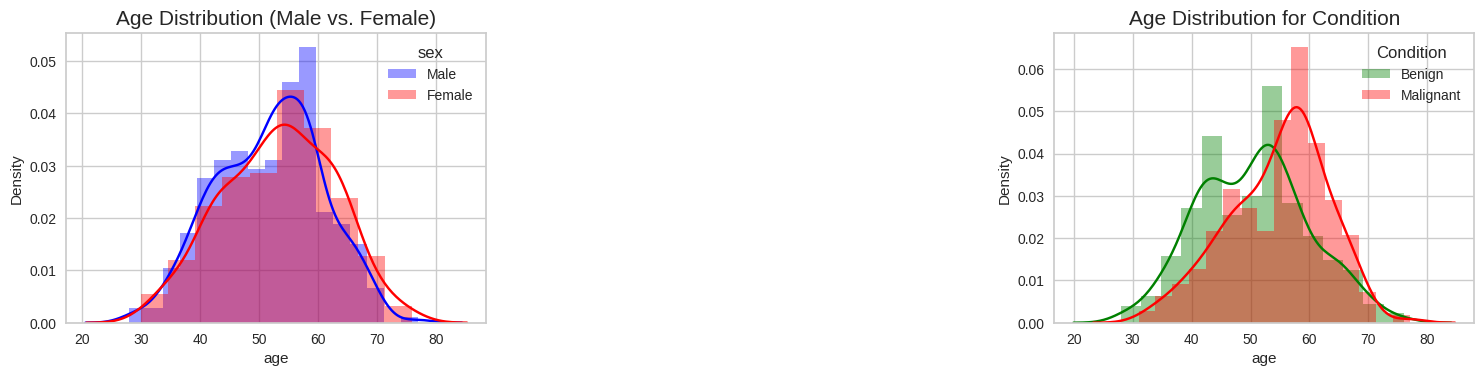

In [50]:
def age_distribution(data):
    """
    Make a standard distribution and distributions for Sex
    """
    fig = plt.figure(figsize=(15, 7))

    # Age distribution for sex
    plt.subplot(2, 3, 1)
    female = df_eda[df_eda['sex']=='Female']['age']
    male = df_eda[df_eda['sex']=='Male']['age']
    sns.distplot(male, color='Blue', label='Male')
    sns.distplot(female, color='Red', label='Female')
    plt.title('Age Distribution (Male vs. Female)', fontsize=15)
    plt.legend(title='sex', fontsize=10)

    # Age distribution for Condition
    plt.subplot(2, 3, 3)
    benign = df_eda[df_eda['heart_disease']=='Absence']['age']
    malignant = df_eda[df_eda['heart_disease']=='Presence']['age']

    sns.distplot(benign, color='Green', label='Benign')
    sns.distplot(malignant, color='Red', label='Malignant')
    plt.title('Age Distribution for Condition', fontsize=15)
    plt.legend(title='Condition', fontsize=10)
    
        
    plt.tight_layout()
    plt.show()


age_distribution(df_eda)


<Figure size 1000x800 with 0 Axes>

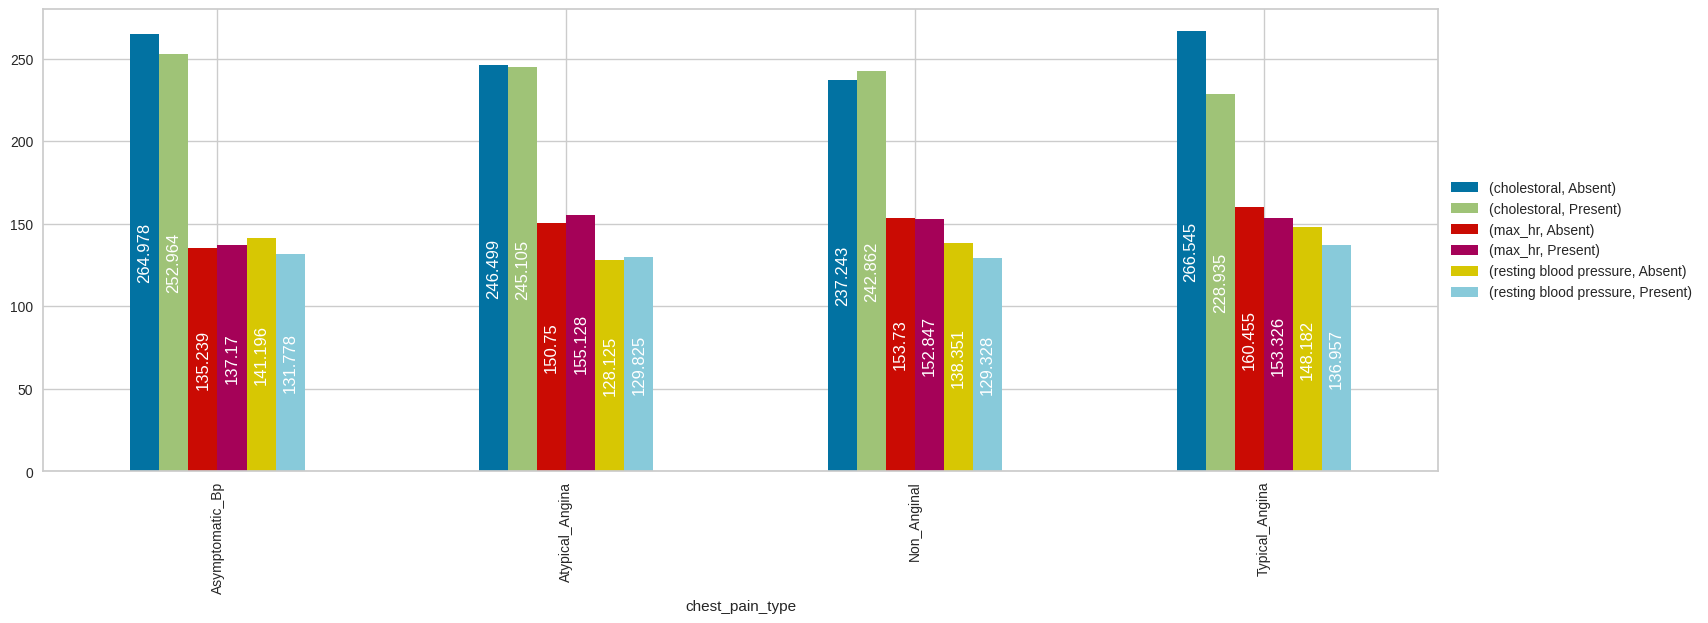

In [33]:
df_disease=df_eda.pivot_table(index="chest_pain_type", columns="fasting_blood_sugar", values=["resting blood pressure","cholestoral","max_hr"])
plt.figure(figsize=(10,8))
ax = df_disease.plot.bar(figsize=(18,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, color='white')
plt.show()

<Figure size 1000x800 with 0 Axes>

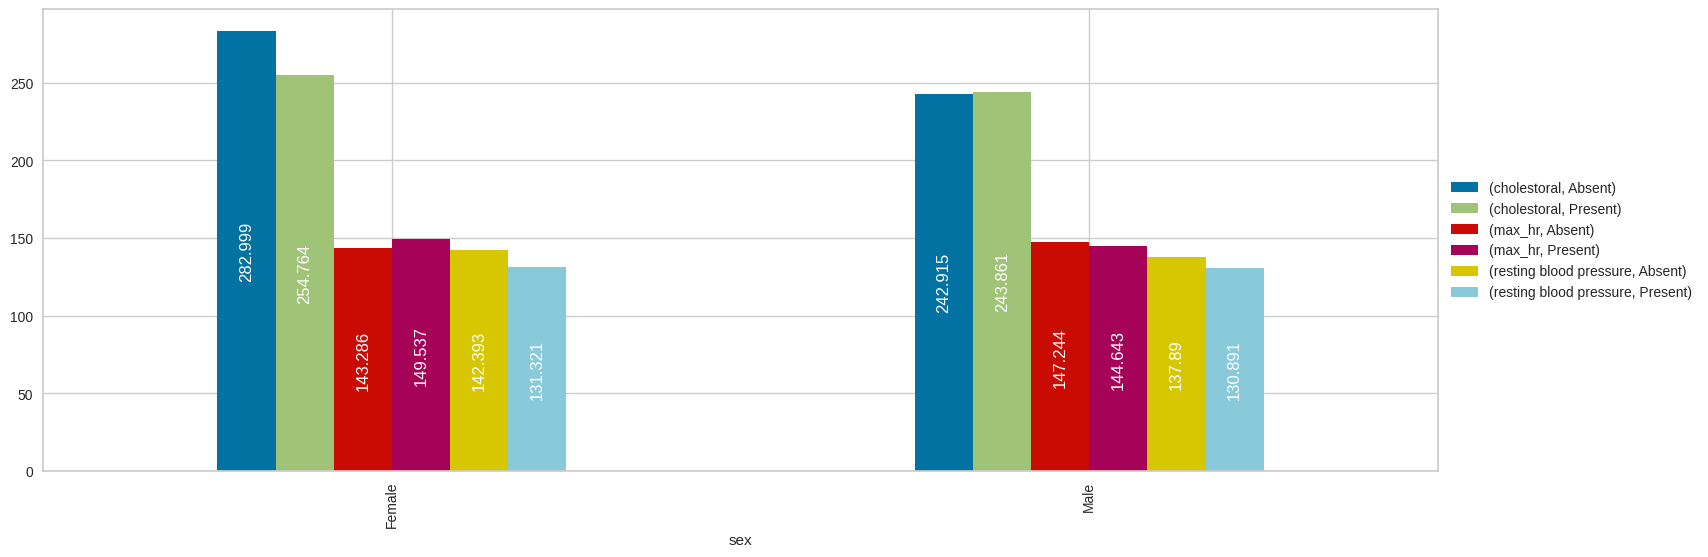

In [34]:
df_disease=df_eda.pivot_table(index="sex", columns="fasting_blood_sugar", values=["resting blood pressure","cholestoral","max_hr"])
plt.figure(figsize=(10,8))
ax = df_disease.plot.bar(figsize=(18,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=90, color='white')
plt.show()

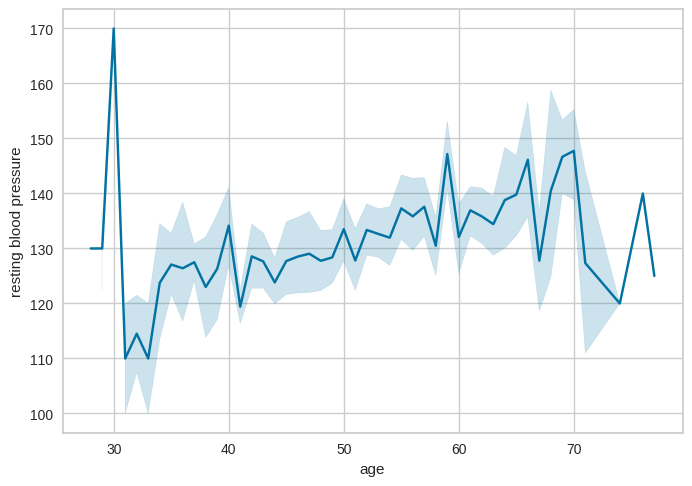

In [35]:
sns.lineplot(y = "resting blood pressure", x = "age", data = df_eda)
#sns.lineplot(x = "cholestoral", y = "age", data = df_eda)
plt.show()

<AxesSubplot: xlabel='age', ylabel='cholestoral'>

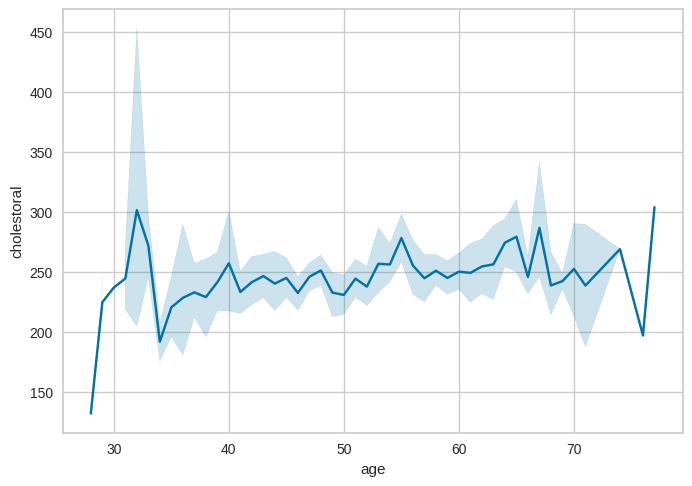

In [36]:
sns.lineplot(y = "cholestoral", x = "age", data = df_eda)

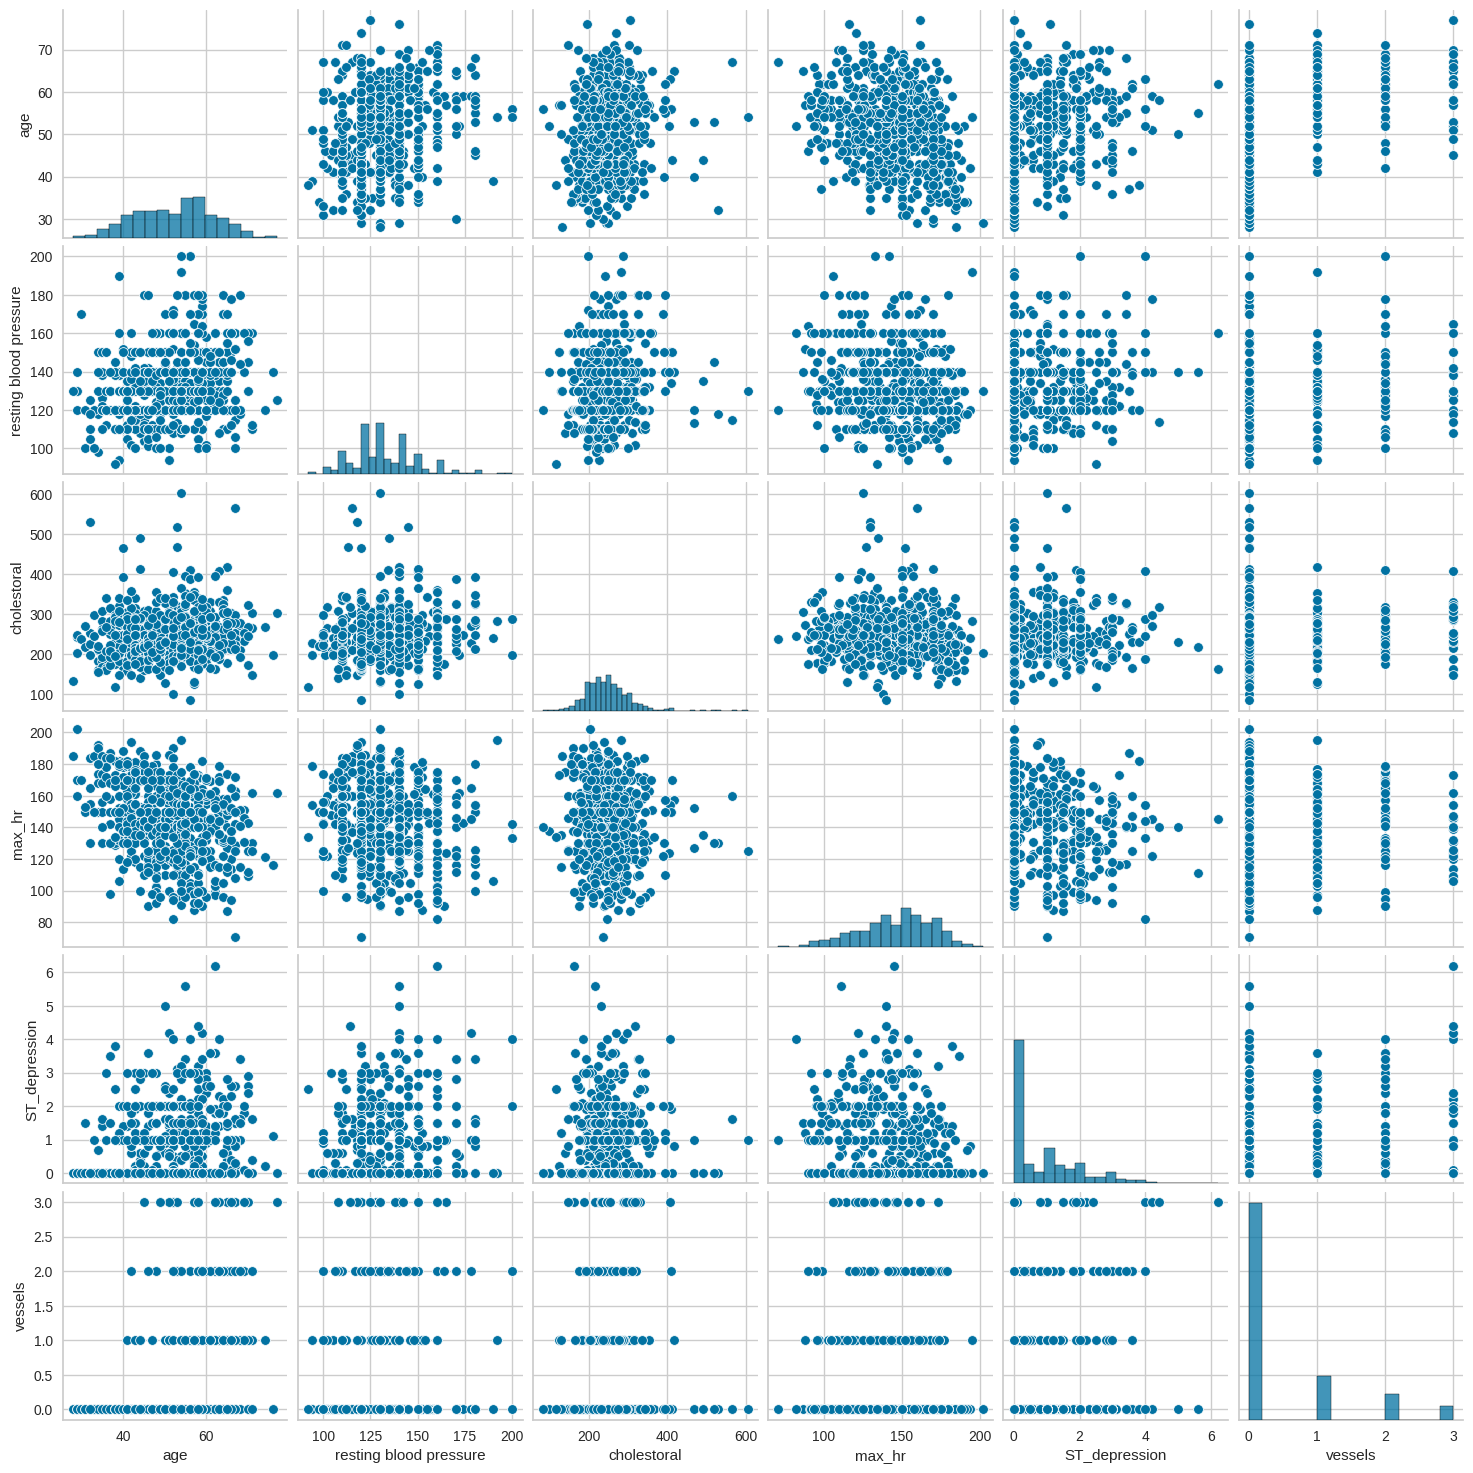

In [37]:
sns.pairplot(df_eda)

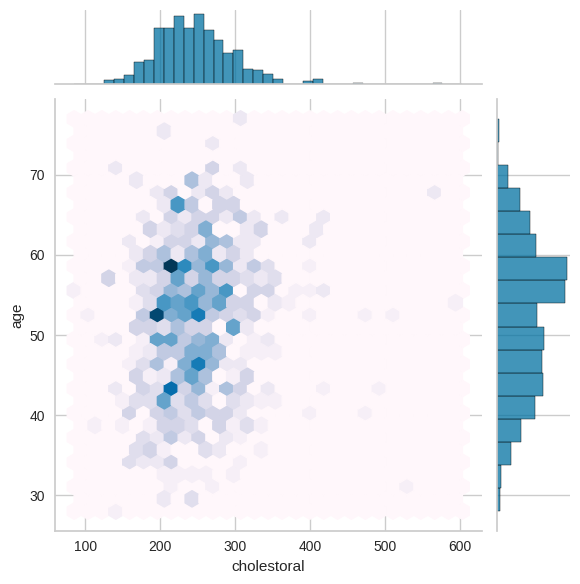

In [38]:
pal = sns.light_palette("blue", as_cmap=True)

sns.jointplot(data=df_eda,
              x='cholestoral',
              y='age',
              kind='hex',
              cmap='PuBu'
              )


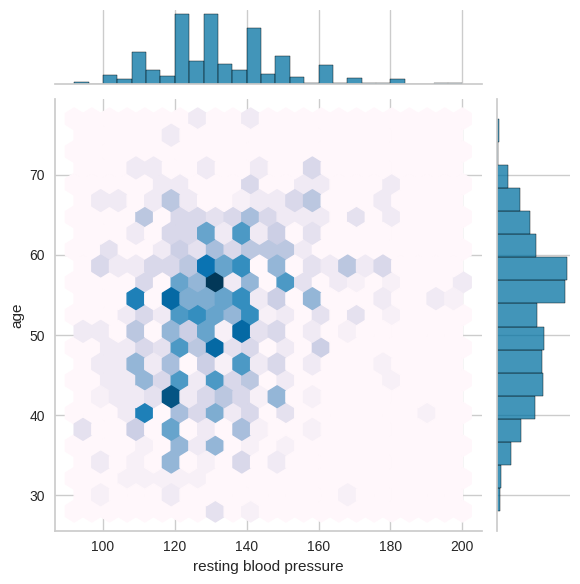

In [39]:
sns.jointplot(data=df_eda,
              x='resting blood pressure',
              y='age',
              kind='hex',
              cmap='PuBu'
              )

Text(0, 0.5, '')

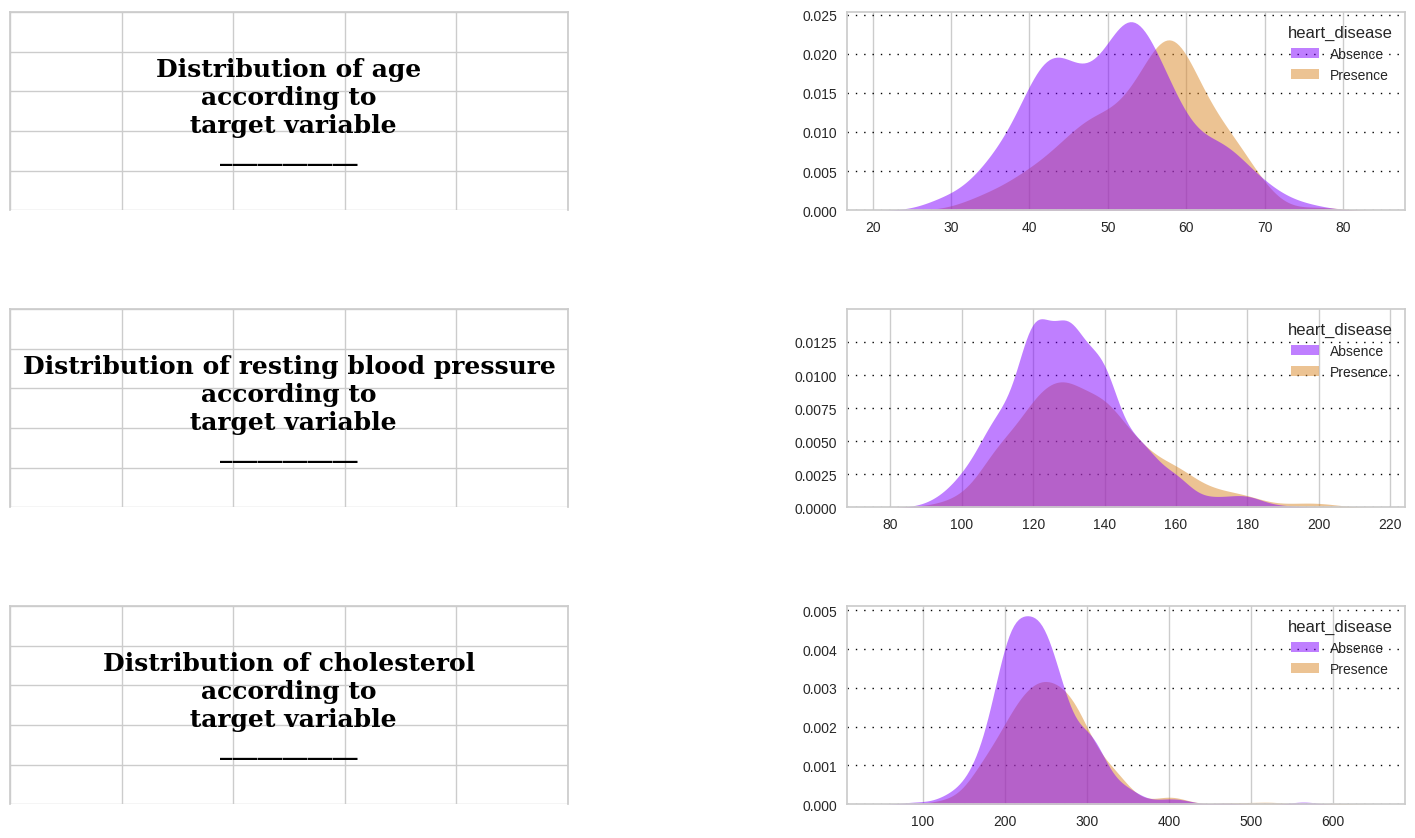

In [40]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])


# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df_eda, x='age',hue="heart_disease", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# resting blood pressure title
ax2.text(0.5,0.5,"Distribution of resting blood pressure\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# resting blood pressure
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df_eda, x='resting blood pressure',hue="heart_disease", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of cholesterol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df_eda, x='cholestoral',hue="heart_disease", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")



Text(0, 0.5, 'fasting_blood_sugar')

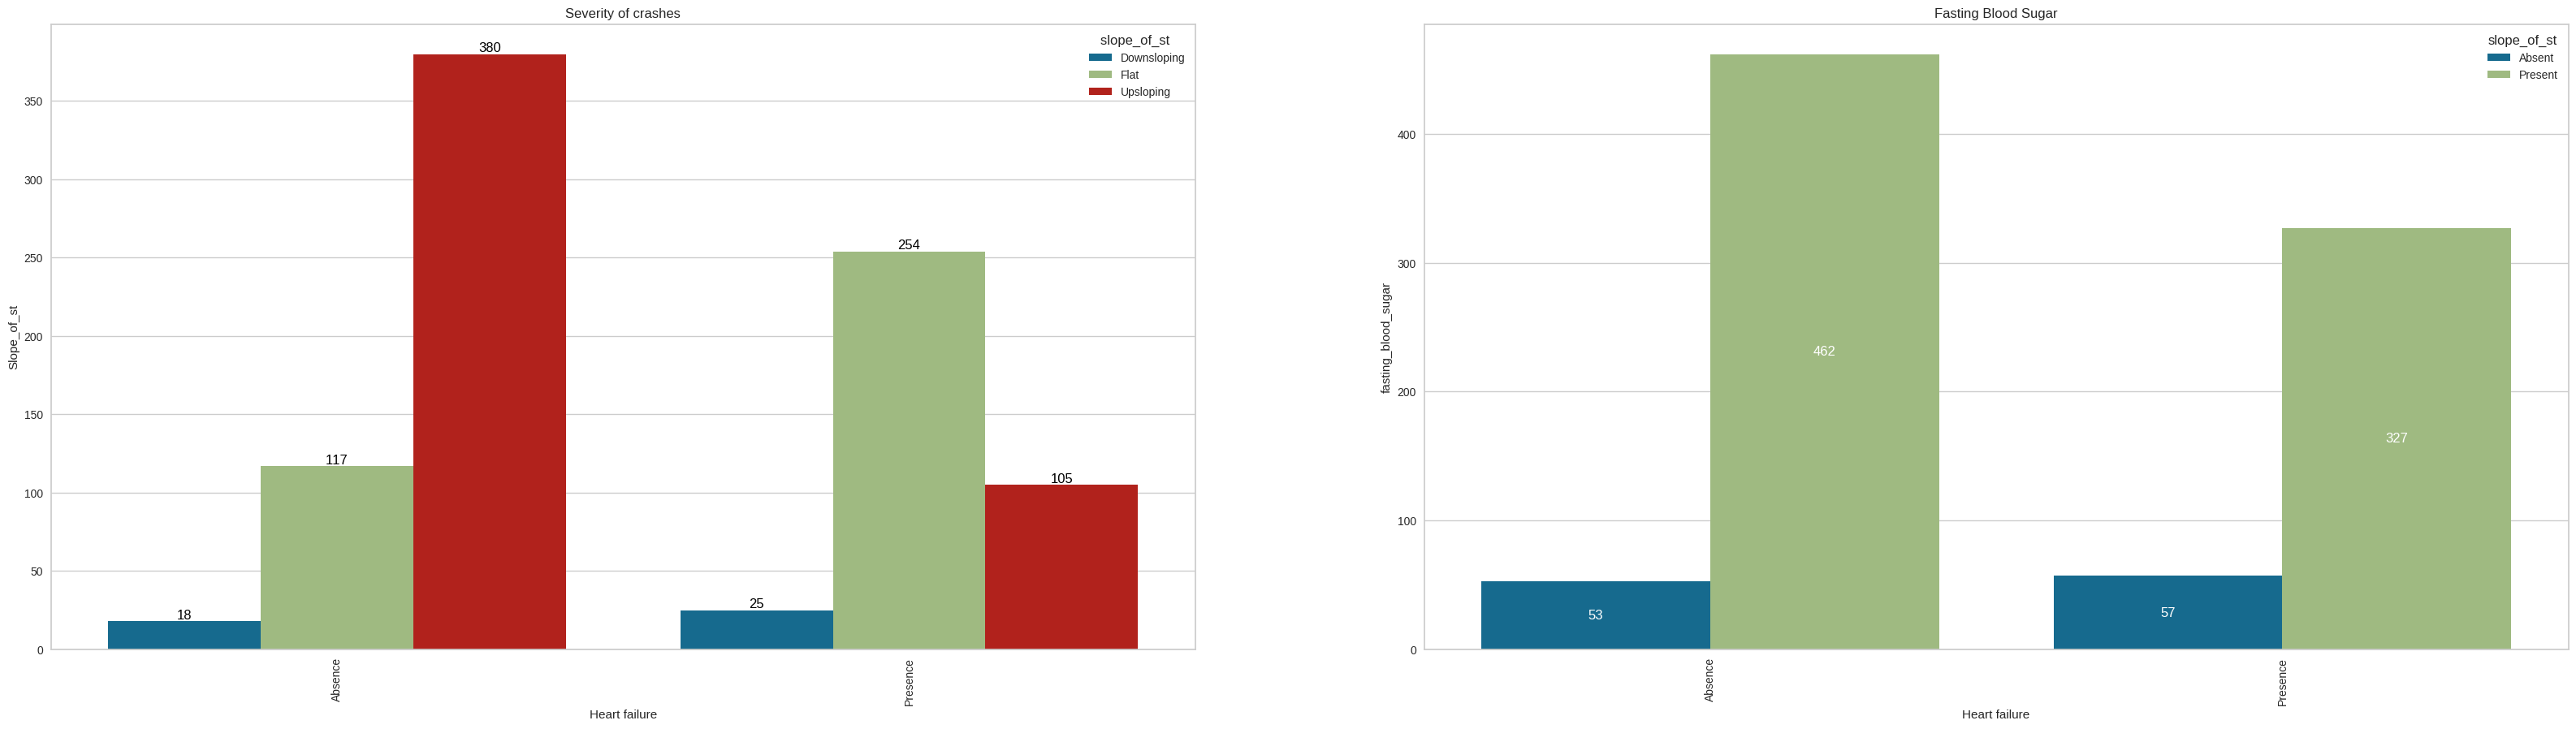

In [41]:
fig, ax = plt.subplots(1,2,figsize=(40,10))
#heart failure due to slope of st
ax1 = sns.countplot(data=df_eda,x='heart_disease', hue='slope_of_st',ax=ax[0],order = df_eda['heart_disease'].value_counts(ascending=False).index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Severity of crashes')
ax1.legend(loc = 'upper right', title = 'slope_of_st ' )
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', color='black')
ax1.set_xlabel('Heart failure')
ax1.set_ylabel('Slope_of_st')


#heart failure due to fasting blood sugar
ax2 = sns.countplot(data=df_eda,x='heart_disease', hue='fasting_blood_sugar',ax=ax[1],order = df_eda['heart_disease'].value_counts(ascending=False).index)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_title('Fasting Blood Sugar')
ax2.legend(loc = 'upper right', title = 'slope_of_st' )
for container in ax2.containers:
    ax2.bar_label(container, label_type='center', rotation=0, color='white')
ax2.set_xlabel('Heart failure')
ax2.set_ylabel('fasting_blood_sugar')

In [42]:
df_eda = df_eda.drop(columns=['ST_depression','vessels'])

In [43]:
df_eda.to_csv("ml_uci_heart.csv")